In [1]:
# Librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Lectura y primera vista del dataset
df_delitos = pd.read_csv('carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv')
df_delitos

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÑOS HÉROES...,NIÑOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633"
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112"
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÁN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467"
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675"
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931002,2019.0,Noviembre,2019-11-09 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,UNIDAD MODELO,2019,Diciembre,2019-12-31 21:59:27,CALZADA DE LA VIGA,RETORNO 509,-99.122554,19.367286,"19.3672864957,-99.1225538062"
931003,2019.0,Diciembre,2019-12-31 22:40:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-2CD,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,2019,Diciembre,2019-12-31 23:31:43,ALBERTO CORREA,NaN,-99.106082,19.505859,"19.5058594991,-99.1060820003"
931004,2019.0,Diciembre,2019-12-31 22:10:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,IZTAPALAPA,SANTA ISABEL INDUSTRIAL,2019,Diciembre,2019-12-31 23:40:25,CALZADA ERMITA IZTAPALAPA,CASI ESQUINA PRIVADA ERMITA IZTAPALAPA,-99.103456,19.355841,"19.355841001,-99.1034556995"
931005,2019.0,Diciembre,2019-12-30 21:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-5,UI-2SD,CUAUHTEMOC,TABACALERA,2019,Diciembre,2019-12-31 23:41:49,PUENTE DE ALVARADO,NaN,-99.152697,19.438391,"19.4383908255,-99.1526971063"


In [3]:
# Se agrega una columna auxiliar para las funciones de agregación
# Pese a que el dataset parece no estar muy sucio, esto es para asegurar que esa columna siempre tendrá valor,
# y así las operaciones groupby serán correctas
df_delitos['aux1']=1

# Mostramos juntos los nombres de las columnas
df_delitos.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'delito', 'categoria_delito',
       'fiscalia', 'agencia', 'unidad_investigacion', 'alcaldia_hechos',
       'colonia_hechos', 'ao_inicio', 'mes_inicio', 'fecha_inicio',
       'calle_hechos', 'calle_hechos2', 'longitud', 'latitud', 'geopoint',
       'aux1'],
      dtype='object')

### 1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos?

Pues lo primero sería evaluar todo el dataset en busca de NaN's. En caso de existir depende muchos de qué campos sean, me refiero a que hay veces que las omisiones de captura se pueden inferir viendo el dataset y completar el dato correspondiente, sin embargo habría que analizar cada caso.

Prácticamente en cada columna es posible realizar una validación para asegurarnos que la información capturada es cuando menos válida técnicamente. Por ejemplo en el campo donde se almacena el año de los delitos, únicamente esperamos ver números, y de éstos ninguno debería ser a un año posterior al que estamos.

En los campos de catálogos habría que revisar que los valores para todos los registros estén dentro del rango de valores válidos para dicho catálogo.

Si existiera un campo de fecha inicio y fecha fin, validar que la fecha inicio siempre sea igual o menor a la fin.

Conforme se va conociendo el problema, se van identificando relaciones entre campos, hay ocasiones en que por regla de negocio, si cada que el campo A tiene el valor x, se restringe el comportamiento del campo B, ese tipo de validciones son más avanzadas y varían de problema a problema.

E incluso pasando ese tipo de pruebas, conforme se va conociendo el dataset, si hay cosas que no tengan sentido van saltando poco a poco luego de analizar una y otra vez los datos.

### 2) ¿Cuántos delitos registrados hay en la tabla?

Me parece que esta pregunta podría tener 2 interpretaciones:

1) Si por delito nos referimos a cada registro de la tabla, el dataset cuenta con 931,007 delitos (dato obtenido luego de leer el archivo csv en el objeto pandas y mostrarlo en patalla)

2) Si por delito nos referimos a los tipos de delitos que se presentan en la tabla, el dataset cuenta con 278 delitos como se muestra a continuación:

In [4]:
df_delitos[['delito','aux1']].groupby('delito').count()

,aux1
delito,
ABANDONO DE PERSONA,3448
ABORTO,445
ABUSO DE AUTORIDAD,6560
ABUSO DE CONFIANZA,15082
ABUSO SEXUAL,10398
...,...
VIOLACION TUMULTUARIA,97
VIOLACION TUMULTUARIA EQUIPARADA,1
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,4


Para tener a la mano la cantidad de registros en los que se presentó un tipo de delito para los 278 casos, ampliaremos temporalmente la capacidad máxima de filas de pandas, ejecutaremos de nuevo el groupby anterior, y posteriormente regresaremos a la normalidad el número máximo de filas

In [5]:
# Ampliamos temporalmente el límite
pd.set_option('display.max_rows', 300)
df_delitos[['delito','aux1']].groupby('delito').count()

,aux1
delito,
ABANDONO DE PERSONA,3448
ABORTO,445
ABUSO DE AUTORIDAD,6560
ABUSO DE CONFIANZA,15082
ABUSO SEXUAL,10398
ACOSO SEXUAL,1801
ALLANAMIENTO DE MORADA,3233
AMENAZAS,44484
ASOCIACION DELICTUOSA,4


In [6]:
# Se regresa a la normalidad
pd.set_option('display.max_rows', 10)

#### ¿Qué rango de tiempo consideran los datos?

Como más adelante se verá, el rango de tiempo es muy amplio, incluso hay un registro de hace más de 100 años. Sin embargo luego de realizar el análisis correspondiente, es posible notar que el volumen y consistencia requeridos se presentan a partir del año 2016 a 2019.

### 3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

Me parece que al pedir "distribución del número de delitos" se puede plantear tanto como distribución geográfica, como distribución a lo largo del tiempo.

In [7]:
# Hacemos el group by por alcaldía
df_delitos[['alcaldia_hechos','aux1']].groupby('alcaldia_hechos').count()

,aux1
alcaldia_hechos,
ABALA,1
ACAMBARO,1
ACAMBAY,2
ACAPULCO DE JUAREZ,33
ACATZINGO,1
...,...
ZIHUATANEJO DE AZUETA,7
ZINACANTEPEC,4
ZINAPECUARO,2


Al hacer el conteo por alcaldía, vemos que el dataset incluye alcaldías del interior de la república, por lo que filtraremos únicamente para las alcaldías de CDMX.

In [8]:
# Listamos las alcaldías correspondientes a CDMX
arr_alcaldias = ['ALVARO OBREGON'
,'AZCAPOTZALCO'
,'BENITO JUAREZ'
,'COYOACAN'
,'CUAJIMALPA DE MORELOS'
,'CUAUHTEMOC'
,'GUSTAVO A MADERO'
,'IZTACALCO'
,'IZTAPALAPA'
,'MAGDALENA'
,'MIGUEL HIDALGO'
,'MILPA ALTA'
,'TLAHUAC'
,'TLALPAN'
,'VENUSTIANO CARRANZA'
,'XOCHIMILCO'
]

# Creamos el dataset que sólo corresponde a CDMX
df_delitos_CDMX=df_delitos.loc[df_delitos['alcaldia_hechos'].isin(arr_alcaldias)]
df_delitos_CDMX

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,aux1
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÑOS HÉROES...,NIÑOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633",1
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112",1
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÁN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467",1
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675",1
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931002,2019.0,Noviembre,2019-11-09 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,UNIDAD MODELO,2019,Diciembre,2019-12-31 21:59:27,CALZADA DE LA VIGA,RETORNO 509,-99.122554,19.367286,"19.3672864957,-99.1225538062",1
931003,2019.0,Diciembre,2019-12-31 22:40:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-2CD,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,2019,Diciembre,2019-12-31 23:31:43,ALBERTO CORREA,NaN,-99.106082,19.505859,"19.5058594991,-99.1060820003",1
931004,2019.0,Diciembre,2019-12-31 22:10:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,IZTAPALAPA,SANTA ISABEL INDUSTRIAL,2019,Diciembre,2019-12-31 23:40:25,CALZADA ERMITA IZTAPALAPA,CASI ESQUINA PRIVADA ERMITA IZTAPALAPA,-99.103456,19.355841,"19.355841001,-99.1034556995",1
931005,2019.0,Diciembre,2019-12-30 21:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-5,UI-2SD,CUAUHTEMOC,TABACALERA,2019,Diciembre,2019-12-31 23:41:49,PUENTE DE ALVARADO,NaN,-99.152697,19.438391,"19.4383908255,-99.1526971063",1


Me llama la atención que la diferencia de registros sólo es de poco más de 23,000 (un 2.5% aproximadamente):

931,007 (incluyendo interior de la república) 

907,364 (únicamente CDMX)

(Esta diferencia tan baja me parece que podría representar un análisis aparte, pero por el momento, no contamos con el tiempo suficiente para ello)


Considero oportuno volver a hacer el agrupamiento por tipo de delito, sólo para confirmar si hay algún tipo de delito que no se cometa en CDMX:

In [9]:
df_delitos_CDMX[['delito','aux1']].groupby('delito').count()

,aux1
delito,
ABANDONO DE PERSONA,3286
ABORTO,431
ABUSO DE AUTORIDAD,6430
ABUSO DE CONFIANZA,14773
ABUSO SEXUAL,9979
...,...
VIOLACION TUMULTUARIA,91
VIOLACION TUMULTUARIA EQUIPARADA,1
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,4


Sólo hay un tipo de delito que se comete en el interior de la república y no en CDMX.

De nueva cuenta, mostramos todos los tipos de delitos junto con su conteo pero ahora sólo de CDMX:

In [10]:
pd.set_option('display.max_rows', 300)
df_delitos_CDMX[['delito','aux1']].groupby('delito').count()

,aux1
delito,
ABANDONO DE PERSONA,3286
ABORTO,431
ABUSO DE AUTORIDAD,6430
ABUSO DE CONFIANZA,14773
ABUSO SEXUAL,9979
ACOSO SEXUAL,1763
ALLANAMIENTO DE MORADA,3149
AMENAZAS,43306
ASOCIACION DELICTUOSA,4


Y ahora sí, veamos la distribución por alcaldía:

In [11]:
pd.set_option('display.max_rows', 20)
df_delitos_CDMX[['alcaldia_hechos','aux1']].groupby('alcaldia_hechos').count()

,aux1
alcaldia_hechos,
ALVARO OBREGON,61675
AZCAPOTZALCO,44677
BENITO JUAREZ,80402
COYOACAN,62171
CUAJIMALPA DE MORELOS,13270
CUAUHTEMOC,149918
GUSTAVO A MADERO,92159
IZTACALCO,39235
IZTAPALAPA,139435


Inmediatamente llama la atención que en la Magdalena Contreras, sólo hay registro de 1 delito. Analicé la base esperando que se tratara porque estaba sucia la columna y que estuviera escrito de varias maneras, pero no fue así, sólo existía ese registro. Para continuar con el ejercicio, dejaremos fuera dicho registro para que no sea un outlayer que cause ruido en el demás análisis.

In [12]:
df_delitos_CDMX.loc[df_delitos_CDMX['alcaldia_hechos']=='MAGDALENA']
# Obtenemos el índice: 710124


,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,aux1
710124,2016.0,Marzo,2016-03-19 04:00:00,VIOLACION,VIOLACIÓN,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-6,FDS-6-02,MAGDALENA,NaN,2016,Marzo,2016-03-19 07:25:49,ANDADOR BENITO JUAREZ,BUENAVISTA,NaN,NaN,NaN,1


In [13]:
# Eliminamos la fila
df_delitos_CDMX.drop(710124,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


De nuevo mostramos la información, pero ahora en forma de gráfica, para tener un insight más visual de la distribución de los delitos por alcaldía.

#### Pese al mensje de warning, sí se eliminó el registro de la Magdalena Contreras,

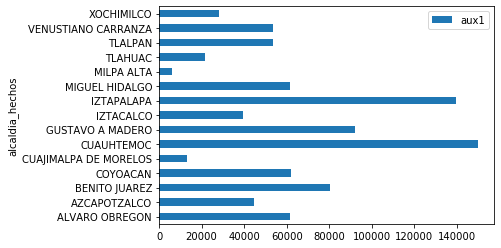

In [14]:
df_aux=df_delitos_CDMX[['alcaldia_hechos','aux1']].groupby('alcaldia_hechos').count()
ax = df_aux.plot.barh()

Se nota claramente cómo es que Iztapalapa y Cuautemoc son las alcaldías donde se cometen más delitos. En gran parte, esto debe podría estar influenciado por ser de las alcalcías con mayor densidad poblacional, aunque esta idea hay que tomarla con cuidado, pues Iztacalco también es de las más densas poblacionalmente y el la cantidad de delitos es baja en comparación a las 2 mencionadas anteriormente.

Y ahora podemos ver la distribución a lo largo del tiempo. Propongo mostrar la distribución por meses, y la cantidad de delitos a lo largo de cada año.

In [15]:
# Distribución de cada mes a lo largo de todos los años
df_delitos_CDMX[['mes_hechos','aux1']].groupby('mes_hechos').count()

,aux1
mes_hechos,
Abril,73468
Agosto,78338
Diciembre,72607
Enero,72268
Febrero,70894
Julio,74867
Junio,74576
Marzo,76717
Mayo,79368


No es conveniente mostrar la información en orden alfabético en este caso, por lo que tendremos que modificar el dataset para que los meses salgan en el orden del año.

In [16]:
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Enero', 'mes_hechos_label'] = '01 - Enero'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Febrero', 'mes_hechos_label'] = '02 - Febrero'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Marzo', 'mes_hechos_label'] = '03 - Marzo'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Abril', 'mes_hechos_label'] = '04 - Abril'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Mayo', 'mes_hechos_label'] = '05 - Mayo'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Junio', 'mes_hechos_label'] = '06 - Junio'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Julio', 'mes_hechos_label'] = '07 - Julio'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Agosto', 'mes_hechos_label'] = '08 - Agosto'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Septiembre', 'mes_hechos_label'] = '09 - Septiembre'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Octubre', 'mes_hechos_label'] = '10 - Octubre'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Noviembre', 'mes_hechos_label'] = '11 - Noviembre'
df_delitos_CDMX.loc[df_delitos_CDMX['mes_hechos'] == 'Diciembre', 'mes_hechos_label'] = '12 - Diciembre'

df_delitos_CDMX[['mes_hechos_label','aux1']].groupby('mes_hechos_label').count()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,aux1
mes_hechos_label,
01 - Enero,72268
02 - Febrero,70894
03 - Marzo,76717
04 - Abril,73468
05 - Mayo,79368
06 - Junio,74576
07 - Julio,74867
08 - Agosto,78338
09 - Septiembre,76369


#### Pese al mensje de warning, sí se actualizaron las etiquetas de los meses

A simple vista, se ve muy parejo el número de delitos por mes, veámoslo en una gráfica para ver si logramos encontrar algo:

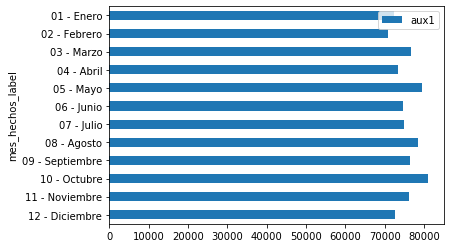

In [17]:
df_aux=df_delitos_CDMX[['mes_hechos_label','aux1']].groupby('mes_hechos_label').count()
ax = df_aux.sort_values(by=['mes_hechos_label'], ascending=False).plot.barh()

Luego de ver la gráfica, pareciera que hay un patrón de alza y baja alternándose cíclicamente a lo largo de todo el año. El mes que tiene menos delitos es febrero, esto podría deberse en parte a que es el mes más corto del año con 28 (o 29) días, por lo que no es posible realizar tantos delitos como en otros meses; el segundo mes con menos delitos es diciembre, lo cual cuadra con el periodo vacacional de invierno. También llama la atención que en junio y julio (que es el otro periodo vacacional del año) los delitos bajan y se mantienen estables. El mes con más delitos es octubre seguido de mayo, los cuales ocurren justo antes de un periodo vacacional.

Ahora realizemos el análisis por año:

In [18]:
pd.set_option('display.max_rows', 110)
df_delitos_CDMX[['ao_hechos','aux1']].groupby('ao_hechos').count()

,aux1
ao_hechos,
1906.0,1
1915.0,2
1930.0,1
1942.0,1
1954.0,1
1955.0,2
1956.0,2
1957.0,1
1958.0,1


De entrada vemos que la información a lo largo del tiempo es poco confiable, pues incluso hay un registro de 1906, pero claramene se ve que no había un registro efectivo de los delitos sino hasta 2016. (No me parece que sea válido comparar la información de 2015, pues da un salto de 10 veces hacia 2016).

In [19]:
# Listamos las alcaldías correspondientes a CDMX
arr_anios = ['2016'
,'2017'
,'2018'
,'2019'
]

# Creamos el dataset que sólo corresponde a CDMX
df_delitos_CDMX_4anios=df_delitos_CDMX.loc[df_delitos_CDMX['ao_hechos'].isin(arr_anios)]
df_delitos_CDMX_4anios

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,aux1,mes_hechos_label
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÑOS HÉROES...,NIÑOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633",1,05 - Mayo
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÁN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467",1,05 - Mayo
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675",1,05 - Mayo
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319",1,05 - Mayo
5,2016.0,Mayo,2016-05-19 08:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-1SD,IZTAPALAPA,ALBARRADA,2016,Mayo,2016-05-19 13:27:58,AVENIDA UNIVERSIDAD,CENTRAL,-99.062780,19.356368,"19.3563679998,-99.06278",1,05 - Mayo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931002,2019.0,Noviembre,2019-11-09 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,UNIDAD MODELO,2019,Diciembre,2019-12-31 21:59:27,CALZADA DE LA VIGA,RETORNO 509,-99.122554,19.367286,"19.3672864957,-99.1225538062",1,11 - Noviembre
931003,2019.0,Diciembre,2019-12-31 22:40:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-2CD,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,2019,Diciembre,2019-12-31 23:31:43,ALBERTO CORREA,NaN,-99.106082,19.505859,"19.5058594991,-99.1060820003",1,12 - Diciembre
931004,2019.0,Diciembre,2019-12-31 22:10:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,IZTAPALAPA,SANTA ISABEL INDUSTRIAL,2019,Diciembre,2019-12-31 23:40:25,CALZADA ERMITA IZTAPALAPA,CASI ESQUINA PRIVADA ERMITA IZTAPALAPA,-99.103456,19.355841,"19.355841001,-99.1034556995",1,12 - Diciembre
931005,2019.0,Diciembre,2019-12-30 21:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-5,UI-2SD,CUAUHTEMOC,TABACALERA,2019,Diciembre,2019-12-31 23:41:49,PUENTE DE ALVARADO,NaN,-99.152697,19.438391,"19.4383908255,-99.1526971063",1,12 - Diciembre


In [20]:
df_delitos_CDMX_4anios[['ao_hechos','aux1']].groupby('ao_hechos').count()

,aux1
ao_hechos,
2016.0,189472
2017.0,220501
2018.0,245916
2019.0,225206


A continuación, plotearemos la cantidad de delitos en los útimos 4 años. Basándonos en lo que observamos en la gráfica de barras, se deberá presentar un patrón tipo zig-zag (por la alternancia entre alta y baja delictiva en cada mes).

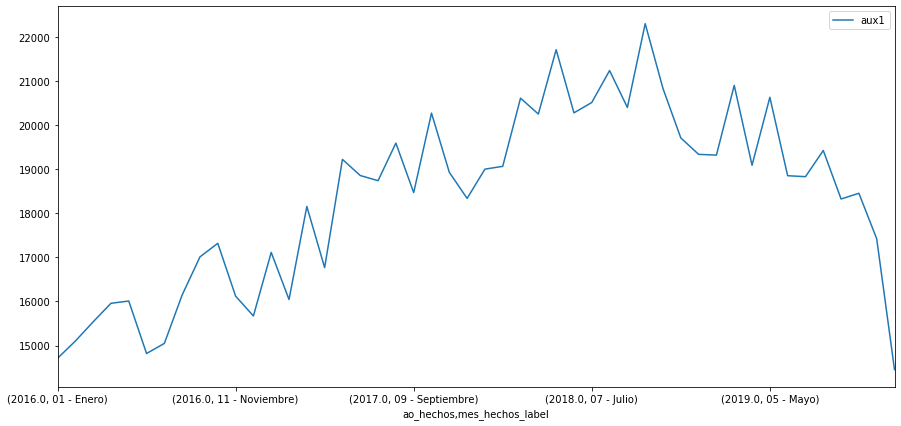

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

df_delitos_CDMX_4anios[['ao_hechos','mes_hechos_label','aux1']] \
    .groupby(['ao_hechos','mes_hechos_label']) \
    .count() \
    .plot(ax=ax)

En los últimos 4 años, podemos apreciar un pico justo en 2018, y en 2019 hubo una baja significativa (al rededor del 2%).

Respecto al tema de los 5 delitos más frecuentes, me parece oportuno sacarlos de manera general (CDMX) y de manera local (alcaldía)

In [22]:
df_delitos_CDMX_4anios[['delito','aux1']].groupby('delito').count()

,aux1
delito,
ABANDONO DE PERSONA,2732
ABORTO,427
ABUSO DE AUTORIDAD,6284
ABUSO DE CONFIANZA,13545
ABUSO SEXUAL,9601
...,...
VIOLACION TUMULTUARIA,89
VIOLACION TUMULTUARIA EQUIPARADA,1
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,4


A continuación se muestra el top 5 de delitos en CDMX:

In [23]:
# Agrupamos, ordenamos por la cantidad de incidencias y sólo mostramos el top 5 de delitos
df_aux = df_delitos_CDMX_4anios[['delito','aux1']].groupby('delito').aggregate(np.sum)
df_aux.sort_values(by=['aux1'], ascending=False).head()

,aux1
delito,
VIOLENCIA FAMILIAR,77744
ROBO A NEGOCIO SIN VIOLENCIA,59482
ROBO DE OBJETOS,56506
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,48032
FRAUDE,45382


In [24]:
df_aux = df_delitos_CDMX_4anios[['alcaldia_hechos','delito','aux1']].groupby(['alcaldia_hechos','delito']).aggregate(np.sum)
df_aux

aux1
alcaldia_hechos delito                                             
ALVARO OBREGON  ABANDONO DE PERSONA                             180
                ABORTO                                           54
                ABUSO DE AUTORIDAD                              287
                ABUSO DE CONFIANZA                              931
                ABUSO SEXUAL                                    722
...                                                             ...
XOCHIMILCO      VIOLACION EQUIPARADA POR CONOCIDO                 2
                VIOLACION EQUIPARADA Y ROBO DE VEHICULO           1
                VIOLACION TUMULTUARIA                             5
                VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO     1
                VIOLENCIA FAMILIAR                             4026

[3293 rows x 1 columns]

In [25]:
# Reseteamos lo índices (de esta manera, el objeto que obtuvimos mediante el group by (objeto Series) se convierte
# en un objeto tipo dataframe)
df_aux=df_aux.reset_index()

# Barremos las alcaldías
for nombre in arr_alcaldias:

    # Filtramos por alcaldía
    df_x_alc=df_aux.loc[df_aux['alcaldia_hechos']==nombre]
    
    # Ordenamos por cantidad de delitos y tomamos sólo los primeros 5 registros
    df_tmp=df_x_alc.sort_values(by=['aux1'], ascending=False).head()
    
    # Álvaro Obregón es el primer registro
    if nombre == 'ALVARO OBREGON':
        df_union_alc=df_tmp
    else:
        df_union_alc=df_union_alc.append(df_tmp)

A continuaicón mostramos el top5 de delitos por alcaldía, se puede notar que no en todas las alcaldías se presentan en el mismo orden de frecuencia los mismos delitos, de hecho, hay delitos que entre delegaciones, no aparecen en el top5.

In [26]:
df_union_alc

,alcaldia_hechos,delito,aux1
226,ALVARO OBREGON,VIOLENCIA FAMILIAR,6027
132,ALVARO OBREGON,ROBO A NEGOCIO SIN VIOLENCIA,3885
186,ALVARO OBREGON,ROBO DE OBJETOS,3455
7,ALVARO OBREGON,AMENAZAS,2969
57,ALVARO OBREGON,FRAUDE,2779
446,AZCAPOTZALCO,VIOLENCIA FAMILIAR,3705
352,AZCAPOTZALCO,ROBO A NEGOCIO SIN VIOLENCIA,3695
407,AZCAPOTZALCO,ROBO DE OBJETOS,2845
234,AZCAPOTZALCO,AMENAZAS,2619
391,AZCAPOTZALCO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,2561


### 4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).


In [27]:
# Generamos un dataframe sólo con la información del año pasado
df_delitos_CDMX_2019=df_delitos_CDMX_4anios.loc[df_delitos_CDMX_4anios['ao_hechos']==2019]
df_delitos_CDMX_2019=df_delitos_CDMX_2019[['mes_hechos_label','delito','aux1']].groupby(['mes_hechos_label','delito']).aggregate(np.sum)

In [28]:
df_delitos_CDMX_2019=df_delitos_CDMX_2019.reset_index()
df_delitos_CDMX_2019

,mes_hechos_label,delito,aux1
0,01 - Enero,ABANDONO DE PERSONA,55
1,01 - Enero,ABORTO,11
2,01 - Enero,ABUSO DE AUTORIDAD,122
3,01 - Enero,ABUSO DE CONFIANZA,308
4,01 - Enero,ABUSO SEXUAL,288
...,...,...,...
2408,12 - Diciembre,VIOLACION,54
2409,12 - Diciembre,VIOLACION DE CORRESPONDENCIA,1
2410,12 - Diciembre,VIOLACION EQUIPARADA,14
2411,12 - Diciembre,VIOLACION TUMULTUARIA,3


Para saber ver cuáles delitos van a la alza o a la baja, ajustaremos una regresión lineal sencilla para cada delito, aquellos con pendiente positiva más grande son los que van a la alta, y aquellos con pendiente negativa más grande, son los que van a la baja

In [29]:
# Declaramos un arreglo con los meses en formato numérico
arr_meses=[1,2,3,4,5,6,7,8,9,10,11,12]

# Declaramos el un dataframe donde iremos almacenando el resultado de cada regresión
df_Tasas = pd.DataFrame(columns = ['delito','total_2019', 'pendiente']) 
df_Tasas 

# Barremos todos los tipos de delitos del año (258):
for delito in df_delitos_CDMX_2019['delito'].unique():
    
    df_aux=df_delitos_CDMX_2019.loc[df_delitos_CDMX_2019['delito']==delito]
    
    x=arr_meses
    y=df_aux['aux1'].to_numpy()
    
    # Sólo podemos ejecutar la regresión si tenemos valores para los 12 meses
    # Y para descartar delitos con pocas incidencias que al final sólo generen ruido,
    # establecemos un threshold de que al menos se cometan de cada delito 100 incidencias en el año
    if y.size==12 and np.sum(y) >= 1000:
        #print("x: ",x,"y: ",y)
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        #print(delito, z[0])
        data=[[delito,np.sum(y), z[0]]]
        df_Tmp= pd.DataFrame(data, columns  = ['delito', 'total_2019','pendiente'])
        df_Tasas=df_Tasas.append(df_Tmp)

Una vez que hemos ajustado el modelo lineal a cada tipo de delito a lo largo del año, ordenamos y nos quedamos con los valores extremos.

In [30]:
df_tasas_altas=df_Tasas.sort_values(by=['pendiente'], ascending=False).head()
df_tasas_altas

,delito,total_2019,pendiente
0,NARCOMENUDEO POSESION SIMPLE,4929,12.290210
0,VIOLENCIA FAMILIAR,23443,10.248252
0,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,3572,4.734266
0,ABUSO DE AUTORIDAD,2032,3.881119
0,LESIONES CULPOSAS POR TRANSITO VEHICULAR,1173,3.506993


In [31]:
# Dataframe con los 12 meses y el top 5 de delitos a la alza
df_tmp_alza=df_delitos_CDMX_2019.loc[df_delitos_CDMX_2019['delito'].isin(df_tasas_altas['delito'])]
df_tmp_alza

,mes_hechos_label,delito,aux1
2,01 - Enero,ABUSO DE AUTORIDAD,122
18,01 - Enero,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,236
67,01 - Enero,LESIONES CULPOSAS POR TRANSITO VEHICULAR,73
74,01 - Enero,NARCOMENUDEO POSESION SIMPLE,388
196,01 - Enero,VIOLENCIA FAMILIAR,1558
199,02 - Febrero,ABUSO DE AUTORIDAD,128
214,02 - Febrero,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,243
262,02 - Febrero,LESIONES CULPOSAS POR TRANSITO VEHICULAR,82
270,02 - Febrero,NARCOMENUDEO POSESION SIMPLE,359
391,02 - Febrero,VIOLENCIA FAMILIAR,1700


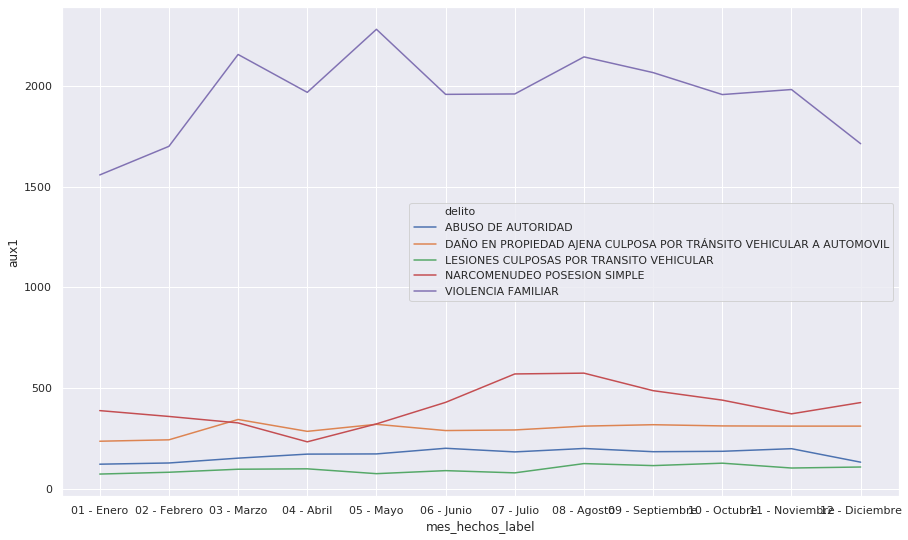

In [32]:
import seaborn as sb
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(15,9)})

sb.lineplot(x="mes_hechos_label", y="aux1", hue="delito",data=df_tmp_alza, ci=None)

Es difícil notar que estos delitos han ido a la alta, esto se debe a 2 factores:
1) El delito de abuso de autoridad, se presenta a una tasa bastante elevada respecto a los demás delitos, al estar en el mismo plot, hace que sea difícil apreciar el comportamiento de los demás delitos que se manejan a una escala menor.
2) En el año 2019 la tasa de delitos fue a la baja en comparación con 2018, lo que ocasiona que las pendientes de las alzas de delitos no están muy marcadas. (En contraste, esperamos ver claramente las tasas a la baja al momento en que grafiquemos los delitos que han disminuido)

In [33]:
df_tasas_bajas=df_Tasas.sort_values(by=['pendiente'], ascending=True).head()
df_tasas_bajas

,delito,total_2019,pendiente
0,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,13014,-38.517483
0,FRAUDE,11168,-30.419580
0,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,2367,-23.737762
0,ROBO DE ACCESORIOS DE AUTO,7989,-21.402098
0,ROBO A NEGOCIO SIN VIOLENCIA,15498,-18.286713


In [34]:
# Dataframe con los 12 meses y el top 5 de delitos a la alza
df_tmp_baja=df_delitos_CDMX_2019.loc[df_delitos_CDMX_2019['delito'].isin(df_tasas_bajas['delito'])]
df_tmp_baja

,mes_hechos_label,delito,aux1
49,01 - Enero,FRAUDE,969
114,01 - Enero,ROBO A NEGOCIO SIN VIOLENCIA,1368
121,01 - Enero,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,291
147,01 - Enero,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1049
152,01 - Enero,ROBO DE ACCESORIOS DE AUTO,755
246,02 - Febrero,FRAUDE,969
302,02 - Febrero,ROBO A NEGOCIO SIN VIOLENCIA,1279
310,02 - Febrero,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,334
338,02 - Febrero,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1404
344,02 - Febrero,ROBO DE ACCESORIOS DE AUTO,734


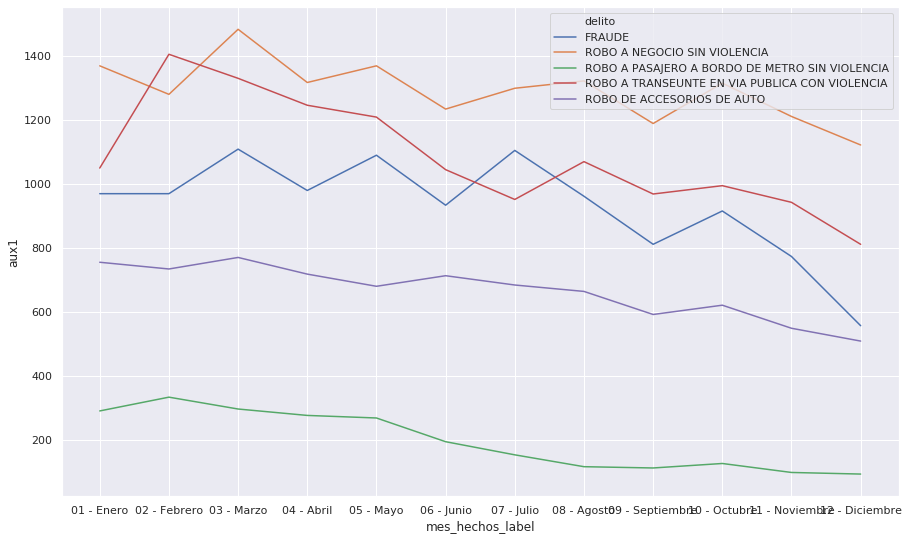

In [35]:
sb.lineplot(x="mes_hechos_label", y="aux1", hue="delito",data=df_tmp_baja, ci=None)

Como lo adelanté en la gráfica anterior, aquí es más notorio cómo ha sido el decremento en la ocurrencia de algunos delitos. Y también al contrario de la tasa a la alza, aquí la cantidad de incidencias por delito no están tan concentradas en una sola parte de la escala.

### 5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?


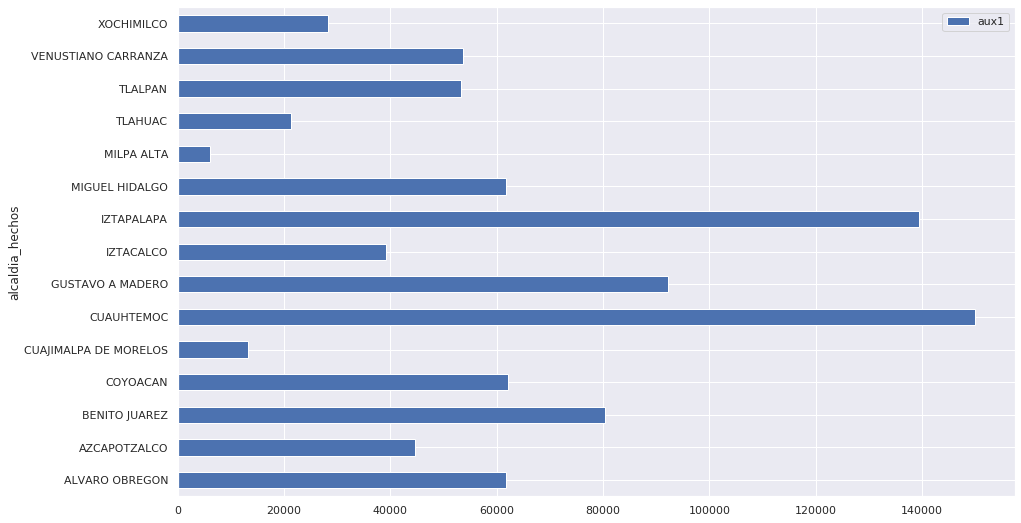

In [36]:
df_aux=df_delitos_CDMX[['alcaldia_hechos','aux1']].groupby('alcaldia_hechos').count()
ax = df_aux.plot.barh()

La alcaldía que tiene más delitos es Cuauhtémoc y la que tiene menos es milpa alta. La alcaldía Cuahutémoc es de las que tiene mayor densidad poblaicional, me parece que debe existir una gran relación entre la cantidad de personas que haya y el número de delitos que se cometan (al menos en CDMX). Por otra parte en Cuahutémoc se encuentra una zona socioeconómica muy activa, pues sobre reforma hay muchas oficinas y corporativos, lo cual puede prestarse para efectuar más delitos a las personas que se mueven regularmente en esa zona. También se tiene el centro histórico, el cual recibe a miles de visitantes cada día, ya sean turistas nacionales o extranjeros, así como personas que van a las tiendas del centro a abastecerse de productos, lo cual implica también una gran movilización tanto de personas como de dinero (sobretodo efectivo). Y así como se tienen zonas turísticas y corporativas, hay zonas sumamente peligrosas, como lo podría se la colonia Vicente Gerrero o el barrio de Tepito. Por todos esos factores, concentrados en un espacio tan pequeño (pues no es muy grande la delegación) considero que el índice delictivo es elevado.

En el otro extremo, se encuentra milpa alta. El hecho de que tenga un índice tan bajo, no necesariamente quiere decir que sea un lugar más pacífico, habría que revisar qué tanta facilidad tienen los habitantes de esa localidad como para presentar una denuncia, y qué tan bien es la gestión de la PGJ en dicho lugar como para llevar adecuadamente el control de denuncias. Haciendo de lado dichas ideas, Milpa Alta se encuentra muy arraigada de las demás zonas de la CDMX, cuenta con un bajo desarrollo urbano lo que conlleva una baja personas y a su vez, una baja circulación de dinero en dicha área. Finalmente su densidad poblacional es mucho más baja que Cuauhtémoc, por lo que a menor cantidad de personas, muy probablemente existe menor cantidad de delitos (insisto, al menos en CDMX).

### 6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos


In [37]:
df_aux = df_delitos_CDMX_4anios[['alcaldia_hechos','colonia_hechos','aux1']].groupby(['alcaldia_hechos','colonia_hechos']).aggregate(np.sum)
df_aux

aux1
alcaldia_hechos colonia_hechos                    
ALVARO OBREGON  19 DE MAYO                      48
                1A AMPLIACIÓN PRESIDENTES      287
                1A VICTORIA                    219
                1ER REACOMODO CORPUS CHRISTI    27
                2A AMPLIACIÓN EL PIRU          107
...                                            ...
XOCHIMILCO      VASO DE REGULACION              69
                VILLA DE LA NORIA                1
                XOCHIMILCO                      41
                XOCHIPILLI                      56
                ZACATEPEC(SAN MATEO XALPA)     126

[1717 rows x 1 columns]

In [38]:
# Reseteamos lo índices (de esta manera, el objeto que obtuvimos mediante el group by (objeto Series) se convierte
# en un objeto tipo dataframe)
df_aux=df_aux.reset_index()

In [39]:
# Barremos las alcaldías
for nombre in arr_alcaldias:

    # Filtramos por alcaldía
    df_x_alc=df_aux.loc[df_aux['alcaldia_hechos']==nombre]
    
    # Ordenamos por cantidad de delitos y tomamos sólo los primeros 3 registros
    df_tmp=df_x_alc.sort_values(by=['aux1'], ascending=False).head(3)
    
    # Álvaro Obregón es el primer registro
    if nombre == 'ALVARO OBREGON':
        df_union_alc_col_top3=df_tmp
    else:
        df_union_alc_col_top3=df_union_alc_col_top3.append(df_tmp)

In [40]:
df_union_alc_col_top3

,alcaldia_hechos,colonia_hechos,aux1
118,ALVARO OBREGON,JARDINES DEL PEDREGAL,2654
220,ALVARO OBREGON,SAN ANGEL,2304
256,ALVARO OBREGON,ZEDEC SANTA FE,2111
276,AZCAPOTZALCO,EL ROSARIO,3157
286,AZCAPOTZALCO,INDUSTRIAL VALLEJO,2143
268,AZCAPOTZALCO,CENTRO DE AZCAPOTZALCO,1968
366,BENITO JUAREZ,DEL VALLE CENTRO,13580
382,BENITO JUAREZ,NARVARTE,10162
389,BENITO JUAREZ,PORTALES SUR,5079
496,COYOACAN,PEDREGAL DE SANTO DOMINGO,5064


En el dataframe anterior se puede observar las 3 colonias más delictivas por cada alcaldía

### 7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

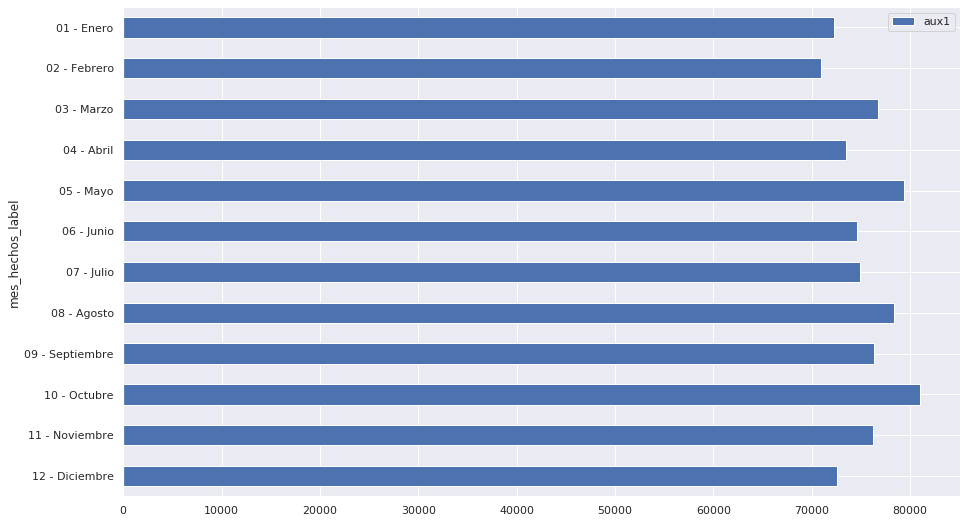

In [41]:
df_aux=df_delitos_CDMX[['mes_hechos_label','aux1']].groupby('mes_hechos_label').count()
ax = df_aux.sort_values(by=['mes_hechos_label'], ascending=False).plot.barh()

Como se había comentado más arriba, al realizar un estudio por mes encuentro una especie de zig-zag que se repite constantemente a lo largo del año. Encontrando que los meses con más delitos son Octubre y Mayo. Estos meses tienen la característica de que son previos a periodos vacacionales, lo que me hace considerar que la delincuencia se prepara pues sabe que en vacaciones habrá menos personas en la ciudad, o que también toman esos periodos para detener sus actividades. Incluso puede que en Octubre se registre un índice más alto que en Mayo debido a la proximidad de las fechas decembrinas que usualemnte conllevan una derrama económica muy fuerte por parte de las personas, incluso para delincuentes. Repecto a los meses con tendencia más baja, podemos identificar claramente a febrero que seguramente tene esos registros por el sesgo que tiene debido a ser el mes más corto del año, y recodemos que prácticamete hay un empate en junio y julio a la baja, que es justamente el periodo de vacaciones de verano.

### 8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Para que sea más manejable la comparación de los delitos que más y menos se cometen en en cada alcalcía, únicamente mostraremos el top 3 y el bottom 3

In [42]:
df_aux = df_delitos_CDMX_4anios[['alcaldia_hechos','delito','aux1']].groupby(['alcaldia_hechos','delito']).aggregate(np.sum)
df_aux

aux1
alcaldia_hechos delito                                             
ALVARO OBREGON  ABANDONO DE PERSONA                             180
                ABORTO                                           54
                ABUSO DE AUTORIDAD                              287
                ABUSO DE CONFIANZA                              931
                ABUSO SEXUAL                                    722
...                                                             ...
XOCHIMILCO      VIOLACION EQUIPARADA POR CONOCIDO                 2
                VIOLACION EQUIPARADA Y ROBO DE VEHICULO           1
                VIOLACION TUMULTUARIA                             5
                VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO     1
                VIOLENCIA FAMILIAR                             4026

[3293 rows x 1 columns]

In [43]:
# Reseteamos lo índices (de esta manera, el objeto que obtuvimos mediante el group by (objeto Series) se convierte
# en un objeto tipo dataframe)
df_aux=df_aux.reset_index()

In [44]:
# Barremos las alcaldías
for nombre in arr_alcaldias:

    # Filtramos por alcaldía
    df_x_alc=df_aux.loc[df_aux['alcaldia_hechos']==nombre]
    
    # Ordenamos por cantidad de delitos y tomamos sólo los primeros 3 registros
    df_tmp=df_x_alc.sort_values(by=['aux1'], ascending=False).head(3)
    
    # Álvaro Obregón es el primer registro
    if nombre == 'ALVARO OBREGON':
        df_union_top3=df_tmp
    else:
        df_union_top3=df_union_top3.append(df_tmp)

In [45]:
arr_Columnas=['ALCALDIA']
arr_Columnas=np.append(arr_Columnas,df_union_top3['delito'].unique())

# Crearemos una matriz de correlación del top3 por delegación
df_Corr = pd.DataFrame(columns = arr_Columnas )

# Barremos las alcaldías para crear el esqueleto del dataframe
for alcaldia in arr_alcaldias:

    # Se crea la fila del dataframe vacía
    data=[alcaldia]
    data=np.append(data, np.zeros(arr_Columnas.size-1))
    
    # Barremos las columnas para ver si en el data set del top3, tenemos ese delito
    i=1
    for delito in df_union_top3['delito'].unique():
        df1=df_union_top3.loc[df_union_top3['alcaldia_hechos']==alcaldia]
        df2=df1.loc[df1['delito']==delito]
        if df2['aux1'].to_numpy().size > 0:
            data[i]=df2['aux1'].to_numpy()[0]
        i=i+1
    
    df_Corr_Aux = pd.DataFrame([data], columns = arr_Columnas )
    df_Corr=df_Corr.append(df_Corr_Aux)

    
df_Corr

,ALCALDIA,VIOLENCIA FAMILIAR,ROBO A NEGOCIO SIN VIOLENCIA,ROBO DE OBJETOS,FRAUDE,ROBO DE ACCESORIOS DE AUTO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,AMENAZAS,ROBO A CASA HABITACION SIN VIOLENCIA,DENUNCIA DE HECHOS
0,ALVARO OBREGON,6027,3885,3455,0.0,0.0,0.0,0.0,0.0,0.0
0,AZCAPOTZALCO,3705,3695,2845,0.0,0.0,0.0,0.0,0.0,0.0
0,BENITO JUAREZ,0.0,7071,0.0,6497,6232,0.0,0.0,0.0,0.0
0,COYOACAN,5253,4698,4377,0.0,0.0,0.0,0.0,0.0,0.0
0,CUAJIMALPA DE MORELOS,1465,1098,855,0.0,0.0,0.0,0.0,0.0,0.0
0,CUAUHTEMOC,0.0,9536,11301,11570,0.0,0.0,0.0,0.0,0.0
0,GUSTAVO A MADERO,9005,6405,0.0,0.0,0.0,4855,0.0,0.0,0.0
0,IZTACALCO,5082,0.0,2008,0.0,0.0,2698,0.0,0.0,0.0
0,IZTAPALAPA,15365,9413,0.0,0.0,0.0,9696,0.0,0.0,0.0
0,MAGDALENA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En el dataframe anterior podemos ver el top3 de delitos por delegación. Me llama mucho la atención que pese a que en cada alcaldía varía el número de incidencias, en general todas las incidencias disminuyen conforme se avanza hacia la derecha. El delito que resulta ser el más común entre todas las alcaldías, es la violencia familiar, lo cual tiene sentido ya que la familia es un elemento que está presente en cualquier parte de la ciudad. A continuación mostraremos el bottom 3 por alcaldía:

In [46]:
# Barremos las alcaldías
for nombre in arr_alcaldias:

    # Filtramos por alcaldía
    df_x_alc=df_aux.loc[df_aux['alcaldia_hechos']==nombre]
    
    # Ordenamos por cantidad de delitos y tomamos sólo los primeros 3 registros
    df_tmp=df_x_alc.sort_values(by=['aux1'], ascending=True).head(3)
    
    # Álvaro Obregón es el primer registro
    if nombre == 'ALVARO OBREGON':
        df_union_bot3=df_tmp
    else:
        df_union_bot3=df_union_bot3.append(df_tmp)

In [47]:
arr_Columnas=['ALCALDIA']
arr_Columnas=np.append(arr_Columnas,df_union_bot3['delito'].unique())

# Crearemos una matriz de correlación del bot3 por delegación
df_Corr = pd.DataFrame(columns = arr_Columnas )

# Barremos las alcaldías para crear el esqueleto del dataframe
for alcaldia in arr_alcaldias:

    # Se crea la fila del dataframe vacía
    data=[alcaldia]
    data=np.append(data, np.zeros(arr_Columnas.size-1))
    
    # Barremos las columnas para ver si en el data set del bot3, tenemos ese delito
    i=1
    for delito in df_union_bot3['delito'].unique():
        df1=df_union_bot3.loc[df_union_bot3['alcaldia_hechos']==alcaldia]
        df2=df1.loc[df1['delito']==delito]
        if df2['aux1'].to_numpy().size > 0:
            data[i]=df2['aux1'].to_numpy()[0]
        i=i+1
    
    df_Corr_Aux = pd.DataFrame([data], columns = arr_Columnas )
    df_Corr=df_Corr.append(df_Corr_Aux)

    
df_Corr

,ALCALDIA,ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA,DDH INCOMPETENCIA,TRAFICO DE INFANTES,ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA,OTROS AMBIENTALES,DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION,ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA,EXPLOTACIÓN DE MENOR O DISCAPACITADO,ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA,...,TRATA DE PERSONAS,ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA,DESAPARICION FORZADA DE PERSONAS,LESIONES INTENCIONALES Y ROBO DE VEHICULO,ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA,ROBO A OFICINA PÚBLICA CON VIOLENCIA,PERDIDA DE LA VIDA POR ASFIXIA,TENTATIVA DE VIOLACION,DDH FDS,DELITOS CONTRA LA SALUD
0,ALVARO OBREGON,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,AZCAPOTZALCO,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,BENITO JUAREZ,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,COYOACAN,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,CUAJIMALPA DE MORELOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,CUAUHTEMOC,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,GUSTAVO A MADERO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,IZTACALCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,IZTAPALAPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,MAGDALENA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Al mostrar el bottom 3 por delegación, notamos que la gama de delitos es muchísimo más amplia en comparación con los delitos con más incidencia.

### 9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

a) Pinta un mapa con este indicador. Describe los resultados.

La información por alcaldía la encontré en la siguiente liga: http://cuentame.inegi.org.mx/monografias/informacion/df/territorio/div_municipal.aspx?tema=me&e=09
Como no es un formato descargable, vamos a crear el dataset corresopndiente a mano. (Por cierto, la información es de 2015.

In [48]:
arr_poblacion = [['ALVARO OBREGON', 749982],
['AZCAPOTZALCO', 400161],
['BENITO JUAREZ', 417416],
['COYOACAN', 608479],
['CUAJIMALPA DE MORELOS', 199224],
['CUAUHTEMOC', 532553],
['GUSTAVO A MADERO', 1164477],
['IZTACALCO', 390348],
['IZTAPALAPA', 1827868],
['MAGDALENA', 243886],
['MIGUEL HIDALGO', 364439],
['MILPA ALTA', 137927],
['TLAHUAC', 361593],
['TLALPAN', 677104],
['VENUSTIANO CARRANZA', 427263],
['XOCHIMILCO', 415933],
]
df_poblacion=pd.DataFrame(arr_poblacion, columns = ['alcaldia_hechos','poblacion'])
df_poblacion

,alcaldia_hechos,poblacion
0,ALVARO OBREGON,749982
1,AZCAPOTZALCO,400161
2,BENITO JUAREZ,417416
3,COYOACAN,608479
4,CUAJIMALPA DE MORELOS,199224
5,CUAUHTEMOC,532553
6,GUSTAVO A MADERO,1164477
7,IZTACALCO,390348
8,IZTAPALAPA,1827868
9,MAGDALENA,243886


In [49]:
# Volvemos a generar el dataset del año
df_delitos_CDMX_2019=df_delitos_CDMX_4anios.loc[df_delitos_CDMX_4anios['ao_hechos']==2019]

In [50]:
# El tipo de homicidio doloso se especifica hasta la columna categoria_delito
df_delitos_CDMX_2019_hom=df_delitos_CDMX_2019[df_delitos_CDMX_2019['categoria_delito'].str.match('HOMICIDIO DOLOSO')]
df_delitos_CDMX_2019_hom=df_delitos_CDMX_2019_hom[['alcaldia_hechos','delito','categoria_delito','aux1']]
df_delitos_CDMX_2019_hom

,alcaldia_hechos,delito,categoria_delito,aux1
278745,IZTAPALAPA,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
278797,IZTACALCO,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
279543,CUAUHTEMOC,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
280051,ALVARO OBREGON,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
280081,MIGUEL HIDALGO,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
...,...,...,...,...
930087,AZCAPOTZALCO,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
930546,IZTACALCO,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
930597,ALVARO OBREGON,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,1
930639,TLAHUAC,HOMICIDIO POR GOLPES,HOMICIDIO DOLOSO,1


In [51]:
# Hacemos el group by por categoria_delito
df_delitos_CDMX_2019_hom = df_delitos_CDMX_2019_hom[['alcaldia_hechos','categoria_delito','aux1']].groupby(['alcaldia_hechos','categoria_delito']).aggregate(np.sum)
df_delitos_CDMX_2019_hom = df_delitos_CDMX_2019_hom.reset_index()
df_delitos_CDMX_2019_hom

,alcaldia_hechos,categoria_delito,aux1
0,ALVARO OBREGON,HOMICIDIO DOLOSO,128
1,AZCAPOTZALCO,HOMICIDIO DOLOSO,48
2,BENITO JUAREZ,HOMICIDIO DOLOSO,21
3,COYOACAN,HOMICIDIO DOLOSO,59
4,CUAJIMALPA DE MORELOS,HOMICIDIO DOLOSO,12
5,CUAUHTEMOC,HOMICIDIO DOLOSO,120
6,GUSTAVO A MADERO,HOMICIDIO DOLOSO,227
7,IZTACALCO,HOMICIDIO DOLOSO,42
8,IZTAPALAPA,HOMICIDIO DOLOSO,343
9,MIGUEL HIDALGO,HOMICIDIO DOLOSO,48


In [52]:
# Hacemos el join entre los datasets mediante la columna de alcaldia, de esta manera ya podremos calcular la tasa
df_delitos_CDMX_2019_hom = df_delitos_CDMX_2019_hom.merge(df_poblacion, on="alcaldia_hechos")
df_delitos_CDMX_2019_hom

,alcaldia_hechos,categoria_delito,aux1,poblacion
0,ALVARO OBREGON,HOMICIDIO DOLOSO,128,749982
1,AZCAPOTZALCO,HOMICIDIO DOLOSO,48,400161
2,BENITO JUAREZ,HOMICIDIO DOLOSO,21,417416
3,COYOACAN,HOMICIDIO DOLOSO,59,608479
4,CUAJIMALPA DE MORELOS,HOMICIDIO DOLOSO,12,199224
5,CUAUHTEMOC,HOMICIDIO DOLOSO,120,532553
6,GUSTAVO A MADERO,HOMICIDIO DOLOSO,227,1164477
7,IZTACALCO,HOMICIDIO DOLOSO,42,390348
8,IZTAPALAPA,HOMICIDIO DOLOSO,343,1827868
9,MIGUEL HIDALGO,HOMICIDIO DOLOSO,48,364439


In [53]:
df_delitos_CDMX_2019_hom['tasa'] = ((df_delitos_CDMX_2019_hom.aux1 / df_delitos_CDMX_2019_hom.poblacion) * 100000) * 12
df_delitos_CDMX_2019_hom

,alcaldia_hechos,categoria_delito,aux1,poblacion,tasa
0,ALVARO OBREGON,HOMICIDIO DOLOSO,128,749982,204.804915
1,AZCAPOTZALCO,HOMICIDIO DOLOSO,48,400161,143.942063
2,BENITO JUAREZ,HOMICIDIO DOLOSO,21,417416,60.371428
3,COYOACAN,HOMICIDIO DOLOSO,59,608479,116.355700
4,CUAJIMALPA DE MORELOS,HOMICIDIO DOLOSO,12,199224,72.280448
5,CUAUHTEMOC,HOMICIDIO DOLOSO,120,532553,270.395623
6,GUSTAVO A MADERO,HOMICIDIO DOLOSO,227,1164477,233.924758
7,IZTACALCO,HOMICIDIO DOLOSO,42,390348,129.115558
8,IZTAPALAPA,HOMICIDIO DOLOSO,343,1827868,225.180374
9,MIGUEL HIDALGO,HOMICIDIO DOLOSO,48,364439,158.051142


El dataframe de arriba contiene la tasa de homicidios culposos en cada alcaldía por cada 100,000 habitantes anualizado. A pesar de ser información de hace algunos años, se observa una tasa alta en la alcaldía Cuauhtémoc (que es la que habíamos visto donde se cometían la mayor cantidad de delitos). Y en Milpa Alta, una de las 3 tasas más bajas.


### 10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

Para realizar este punto, retomaresmos el top 3 de colonias delictivas por alcaldía y le realizaremos algunos ajustes:

In [54]:
# Retomando el top3 de colonias por alcaldía, lo complementaremos para generar índices relativos a la delegación,
# y relativo al total de la CDMX
df_union_alc_col_top3

,alcaldia_hechos,colonia_hechos,aux1
118,ALVARO OBREGON,JARDINES DEL PEDREGAL,2654
220,ALVARO OBREGON,SAN ANGEL,2304
256,ALVARO OBREGON,ZEDEC SANTA FE,2111
276,AZCAPOTZALCO,EL ROSARIO,3157
286,AZCAPOTZALCO,INDUSTRIAL VALLEJO,2143
268,AZCAPOTZALCO,CENTRO DE AZCAPOTZALCO,1968
366,BENITO JUAREZ,DEL VALLE CENTRO,13580
382,BENITO JUAREZ,NARVARTE,10162
389,BENITO JUAREZ,PORTALES SUR,5079
496,COYOACAN,PEDREGAL DE SANTO DOMINGO,5064


In [55]:
df_total_x_alc=df_delitos_CDMX[['alcaldia_hechos','aux1']].groupby('alcaldia_hechos').count()
df_total_x_alc=df_total_x_alc.reset_index()
df_total_x_alc['total_absoluto']=df_total_x_alc['aux1'].sum()
df_total_x_alc

,alcaldia_hechos,aux1,total_absoluto
0,ALVARO OBREGON,61675,907363
1,AZCAPOTZALCO,44677,907363
2,BENITO JUAREZ,80402,907363
3,COYOACAN,62171,907363
4,CUAJIMALPA DE MORELOS,13270,907363
5,CUAUHTEMOC,149918,907363
6,GUSTAVO A MADERO,92159,907363
7,IZTACALCO,39235,907363
8,IZTAPALAPA,139435,907363
9,MIGUEL HIDALGO,61720,907363


In [56]:
# Hacemos el merge y de paso renombramos las columnas para que tengan nombres más significativos
df_union_alc_col_top3 = df_union_alc_col_top3.merge(df_total_x_alc, on="alcaldia_hechos")
df_union_alc_col_top3.rename(columns={'alcaldia_hechos':'alcaldia_hechos',
                          'colonia_hechos':'colonia_hechos',
                          'aux1_x':'total_x_col',
                          'aux1_y':'total_x_alc',
                          'total_absoluto':'total_absoluto',                                     }, 
                 inplace=True)
df_union_alc_col_top3

,alcaldia_hechos,colonia_hechos,total_x_col,total_x_alc,total_absoluto
0,ALVARO OBREGON,JARDINES DEL PEDREGAL,2654,61675,907363
1,ALVARO OBREGON,SAN ANGEL,2304,61675,907363
2,ALVARO OBREGON,ZEDEC SANTA FE,2111,61675,907363
3,AZCAPOTZALCO,EL ROSARIO,3157,44677,907363
4,AZCAPOTZALCO,INDUSTRIAL VALLEJO,2143,44677,907363
5,AZCAPOTZALCO,CENTRO DE AZCAPOTZALCO,1968,44677,907363
6,BENITO JUAREZ,DEL VALLE CENTRO,13580,80402,907363
7,BENITO JUAREZ,NARVARTE,10162,80402,907363
8,BENITO JUAREZ,PORTALES SUR,5079,80402,907363
9,COYOACAN,PEDREGAL DE SANTO DOMINGO,5064,62171,907363


In [57]:
# Retomando un poco la idea de hacer la tasa anual, hacemos lo mismo pero en vez de que sea por cada 100 mil habitantes, sólo
# será por cada 100.
df_union_alc_col_top3['tasa_x_alc'] = ((df_union_alc_col_top3.total_x_col / df_union_alc_col_top3.total_x_alc) * 100) * 12
df_union_alc_col_top3['tasa_x_Cdmx'] = ((df_union_alc_col_top3.total_x_col / df_union_alc_col_top3.total_absoluto) * 100) * 12
df_union_alc_col_top3

,alcaldia_hechos,colonia_hechos,total_x_col,total_x_alc,total_absoluto,tasa_x_alc,tasa_x_Cdmx
0,ALVARO OBREGON,JARDINES DEL PEDREGAL,2654,61675,907363,51.638427,3.509951
1,ALVARO OBREGON,SAN ANGEL,2304,61675,907363,44.828537,3.047072
2,ALVARO OBREGON,ZEDEC SANTA FE,2111,61675,907363,41.073368,2.791826
3,AZCAPOTZALCO,EL ROSARIO,3157,44677,907363,84.795309,4.175176
4,AZCAPOTZALCO,INDUSTRIAL VALLEJO,2143,44677,907363,57.559818,2.834147
5,AZCAPOTZALCO,CENTRO DE AZCAPOTZALCO,1968,44677,907363,52.859413,2.602707
6,BENITO JUAREZ,DEL VALLE CENTRO,13580,80402,907363,202.681525,17.959736
7,BENITO JUAREZ,NARVARTE,10162,80402,907363,151.667869,13.439384
8,BENITO JUAREZ,PORTALES SUR,5079,80402,907363,75.804084,6.717047
9,COYOACAN,PEDREGAL DE SANTO DOMINGO,5064,62171,907363,97.743321,6.697209


Tras analizar el dataframe anterior, considero que un buen indicador delictivo será el valor de la columna "tasa_x_Cdmx", estableciendo un threshold de 5 puntos para considerar esa colonia como una zona de cuidado, por lo que la lista final quedaría de la siguiente manera:

In [58]:
df_union_alc_col_top3.loc[df_union_alc_col_top3['tasa_x_Cdmx'] >= 5.0]

,alcaldia_hechos,colonia_hechos,total_x_col,total_x_alc,total_absoluto,tasa_x_alc,tasa_x_Cdmx
6,BENITO JUAREZ,DEL VALLE CENTRO,13580,80402,907363,202.681525,17.959736
7,BENITO JUAREZ,NARVARTE,10162,80402,907363,151.667869,13.439384
8,BENITO JUAREZ,PORTALES SUR,5079,80402,907363,75.804084,6.717047
9,COYOACAN,PEDREGAL DE SANTO DOMINGO,5064,62171,907363,97.743321,6.697209
15,CUAUHTEMOC,CENTRO,30621,149918,907363,245.101989,40.496692
16,CUAUHTEMOC,DOCTORES,16570,149918,907363,132.632506,21.914052
17,CUAUHTEMOC,ROMA NORTE,11359,149918,907363,90.921704,15.022433
18,GUSTAVO A MADERO,LINDAVISTA,4143,92159,907363,53.945898,5.479174
21,IZTACALCO,AGRÍCOLA ORIENTAL,7475,39235,907363,228.622403,9.885790
22,IZTACALCO,AGRÍCOLA PANTITLAN,6164,39235,907363,188.525551,8.151974


Me parece adecuado este indicador, ya que todas las colonias que se enlistan, son aquellas que son las más mencionadas en las noticias respecto a delitos.

a) Pinta un mapa con este indicador. Describe los resultados.

### 11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados).

a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?


### 12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?